In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("new 2020 data.xlsx")
data.head()

,date_arrival,week,Arrival,MIN,MAX,MODAL,year,month,day
0,2017-01-02,1,2909,101,781,690,2017,1,2
1,2017-01-03,1,2831,101,814,725,2017,1,3
2,2017-01-04,1,2707,220,811,711,2017,1,4
3,2017-01-05,1,2744,360,799,700,2017,1,5
4,2017-01-06,1,3392,210,771,675,2017,1,6


In [3]:
data.shape

(432, 9)

In [4]:
def plot_df(data, x, y, title="", xlabel='MODAL', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

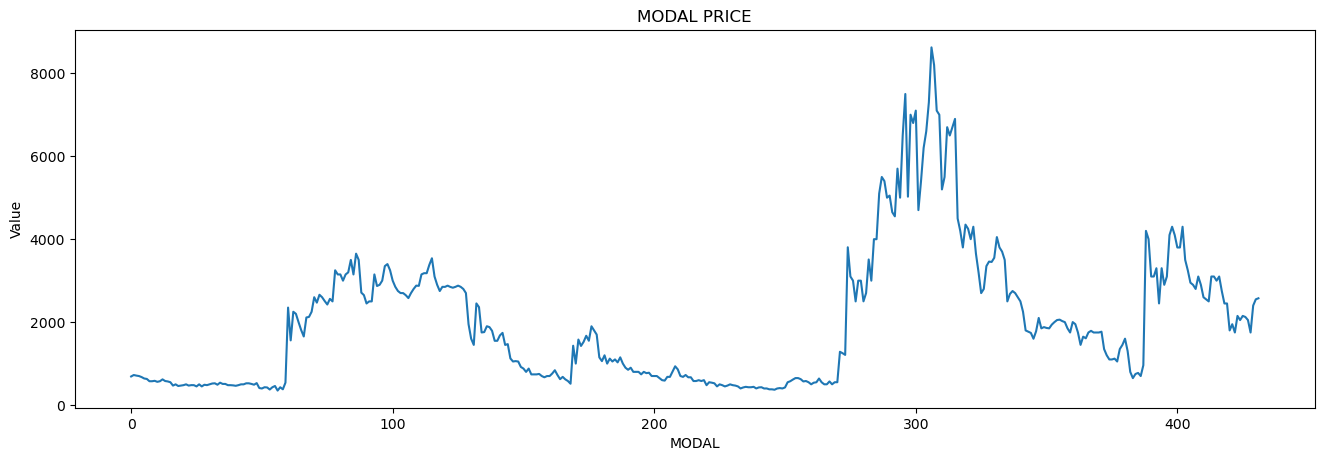

In [5]:
plot_df(data, x=data.index, y=data.MODAL, title='MODAL PRICE')

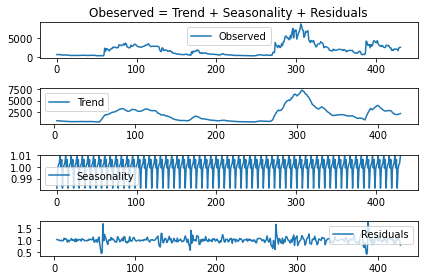

In [6]:
# Naive decomposition of our Time Series as explained above
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data.MODAL.values, model='multiplicative',period = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.title('Obeserved = Trend + Seasonality + Residuals')
plt.plot(data.MODAL.values,label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
%matplotlib inline
import itertools
import warnings
plt.style.use('ggplot')

In [8]:
test_result=adfuller(data['MODAL'])

In [9]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Arrival):
    result=adfuller(Arrival)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [10]:
adfuller_test(data['MODAL'])

ADF Test Statistic : -2.96483870719792
p-value : 0.038311061897739675
#Lags Used : 14
Number of Observations Used : 417
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


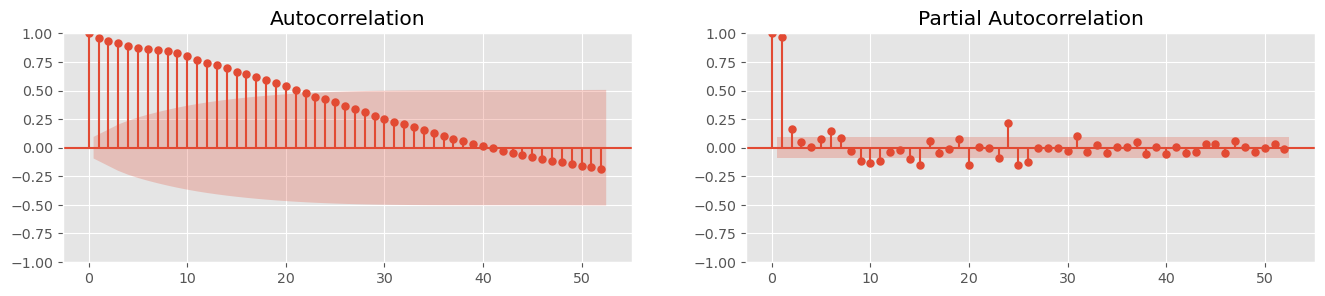

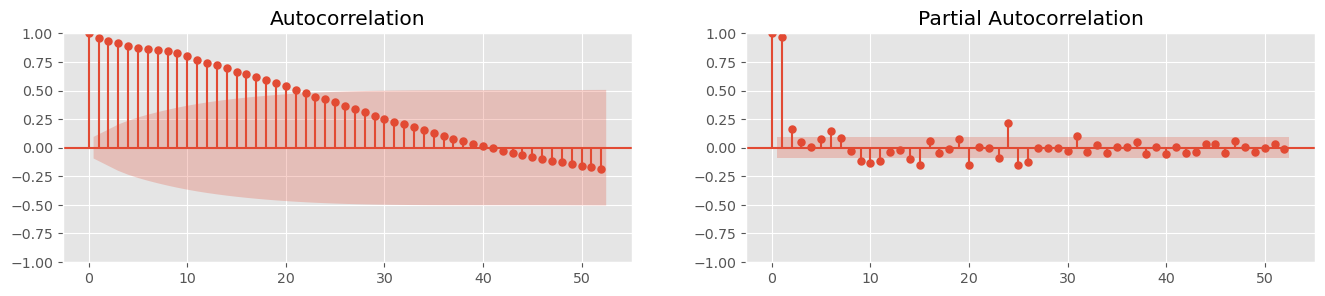

In [11]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 101)
plot_acf(data.MODAL.tolist(), lags=52, ax=axes[0])
plot_pacf(data.MODAL.tolist(), lags=52, ax=axes[1])

In [13]:
from pmdarima import auto_arima

In [14]:
# Seasonal - fit stepwise auto-ARIMA
model = auto_arima(data['MODAL'], start_p=1, start_q=0,
                         test='adf',
                         max_p=3, max_q=0, m=52,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=23.93 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=5958.723, Time=0.45 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=5851.014, Time=20.92 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=inf, Time=25.69 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=5951.381, Time=0.76 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=inf, Time=70.05 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=30.23 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=inf, Time=130.89 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=5857.063, Time=12.70 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=5849.766, Time=27.07 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=5953.281, Time=1.25 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=inf, Time=96.93 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=inf, Time=82.78 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=35.00 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=inf,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  432
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -2920.883
Date:                            Wed, 18 May 2022   AIC                           5849.766
Time:                                    12:59:45   BIC                           5865.517
Sample:                                         0   HQIC                          5856.017
                                            - 432                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1595      0.038     -4.194      0.000      -0.234      -0.085
ar.L2         -0.0937      0.037     -2.536      0.011      -0.166      -0.021
ar.S.L52      -0.5177      0.030    -17.287      0.000      -0.576      -0.459
sigma2      2.816e+05   1.03e+04     27.457      0.000    2.62e+05    3.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               667.26
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               4.04   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

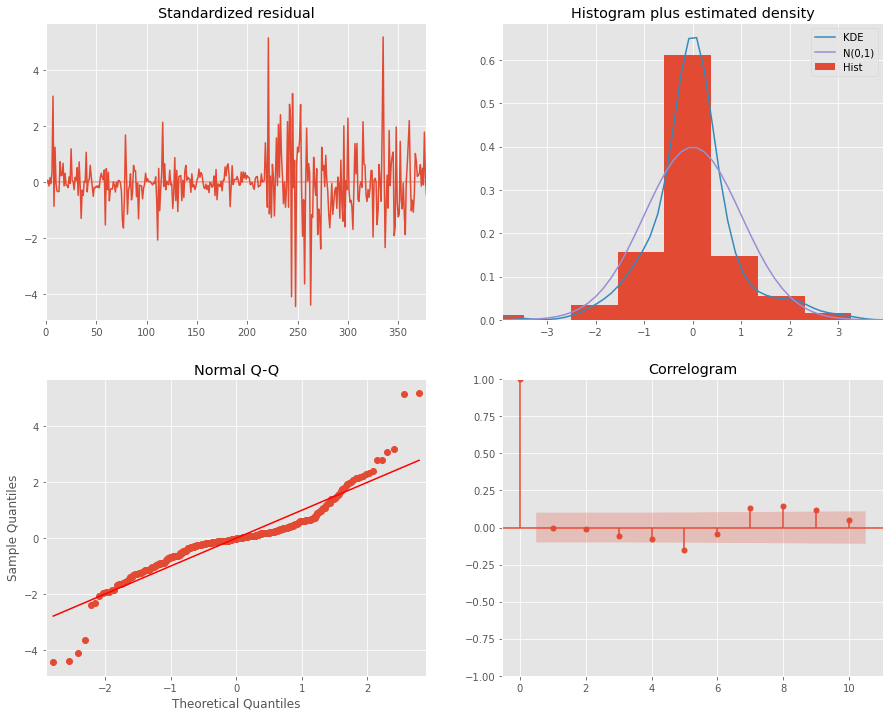

In [15]:
#Diagnosing the model residuals
model.plot_diagnostics(figsize=(15,12));

In [16]:
import statsmodels.api as sm

In [17]:
model=sm.tsa.statespace.SARIMAX(data['MODAL'],order=(2, 1, 0),seasonal_order=(1,1,0,52))
results=model.fit()

<AxesSubplot:>

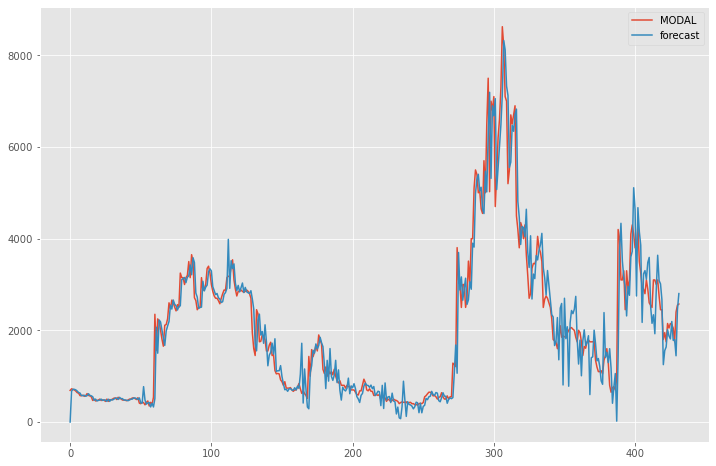

In [18]:
data['forecast']=results.predict(dynamic=False)
data[['MODAL','forecast']].plot(figsize=(12,8))

In [20]:
model_SARIMA=SARIMAX(data['MODAL'],order=(2,1,0),seasonal_order=(1,1,0,52))

In [21]:
model_SARIMA_fit=model_SARIMA.fit()

In [22]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              MODAL   No. Observations:                  432
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -2920.883
Date:                            Wed, 18 May 2022   AIC                           5849.766
Time:                                    13:17:13   BIC                           5865.517
Sample:                                         0   HQIC                          5856.017
                                            - 432                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1595      0.038     -4.194      0.000      -0.234      -0.085
ar.L2         -0.0937      0.037     -2.536      0.011      -0.166      -0.021
ar.S.L52      -0.5177      0.030    -17.287      0.000      -0.576      -0.459
sigma2      2.816e+05   1.03e+04     27.457      0.000    2.62e+05    3.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               667.26
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               4.04   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
pred_Sarima=model_SARIMA_fit.predict()

In [24]:
pred_Sarima.head()

0      0.000000
1    673.352023
2    714.786350
3    712.977990
4    701.289826
Name: predicted_mean, dtype: float64

In [25]:
df = pd.DataFrame({'Actual':data['MODAL'], 'Predicted': pred_Sarima})
#df.to_csv("PREDICTED2020.csv")

In [26]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(data['MODAL'], pred_Sarima)) 



500.90752992359677

NOW FOR 2021 Predictions:

In [27]:
df20=pd.read_excel("new2021Preddiction.xlsx")

In [28]:
df20.head()

,date_arrival,week,Arrival,MIN,MAX,MODAL,year,month,day
0,2021-01-01,53,22,1000,2912,2350,2021,1,1
1,2021-01-02,53,10,911,2752,2350,2021,1,2
2,2021-01-04,1,22,1100,2851,2640,2021,1,4
3,2021-01-05,1,2157,1200,2835,2670,2021,1,5
4,2021-01-06,1,1380,900,2641,2550,2021,1,6


In [29]:
df20.shape

(138, 9)

In [30]:
def plot_df(data, x, y, title="", xlabel='MODAL', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

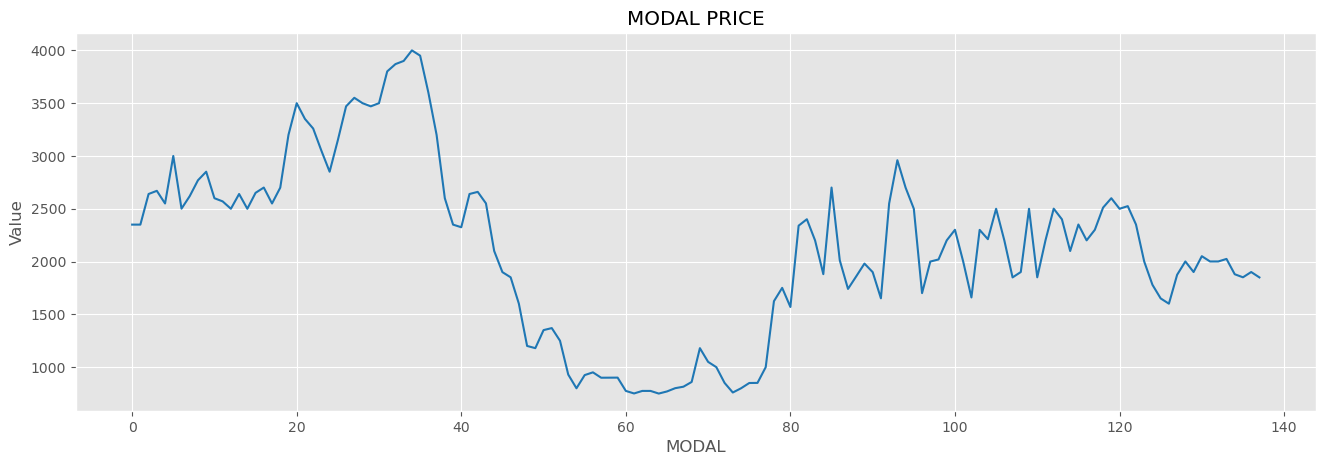

In [31]:
plot_df(df20, x=df20.index, y=df20.MODAL, title='MODAL PRICE')

In [32]:
import statsmodels.api as sm

In [35]:
model=sm.tsa.statespace.SARIMAX(df20['MODAL'],order=(2, 1, 0),seasonal_order=(1,1,0,52))
results=model.fit()

<AxesSubplot:>

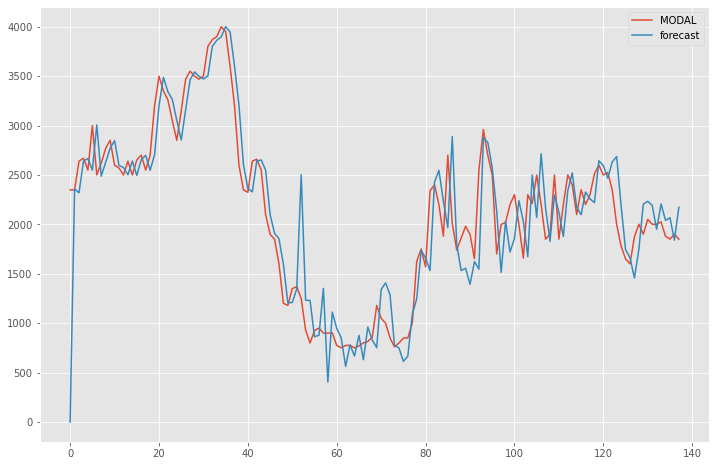

In [36]:
df20['forecast']=results.predict(dynamic=False)
df20[['MODAL','forecast']].plot(figsize=(12,8))

In [39]:
model_SARIMA=SARIMAX(df20['MODAL'],order=(2,1,0),seasonal_order=(1,1,0,52))

In [40]:
model_SARIMA_fit=model_SARIMA.fit()

In [41]:
pred_Sarima=model_SARIMA_fit.predict()

In [42]:
pred_Sarima.head()

0       0.000000
1    2357.961375
2    2320.680563
3    2639.314406
4    2667.661084
Name: predicted_mean, dtype: float64

In [43]:
df = pd.DataFrame({'Actual':df20['MODAL'], 'Predicted': pred_Sarima})
#df.to_csv("FORECAST2021.csv")
df.shape

(138, 2)

In [44]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(df20['MODAL'], pred_Sarima)) 



375.0490552211416